Regression Analysis

1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#import data frame
df = pd.read_csv(r'/Users/samuelcallender/Documents/World University Rankings/02 Data/Prepared Data/cwurData_checked.csv')

2. Clean the data in preparation for analysis

In [4]:
df.shape

(2200, 14)

In [5]:
df.head(10)

,World Rank,Institution,Country,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Publications,Influence,Citations,Broad Impact,Patents,Score,Year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [6]:
df.columns

Index(['World Rank', 'Institution', 'Country', 'National Rank',
       'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Publications', 'Influence', 'Citations', 'Broad Impact', 'Patents',
       'Score', 'Year'],
      dtype='object')

In [8]:
#check for missing values
df.isnull().sum()

World Rank                0
Institution               0
Country                   0
National Rank             0
Quality of Education      0
Alumni Employment         0
Quality of Faculty        0
Publications              0
Influence                 0
Citations                 0
Broad Impact            200
Patents                   0
Score                     0
Year                      0
dtype: int64

In [9]:
#check for duplicates
duplicates = df.duplicated()
duplicates.shape

(2200,)

In [10]:
#drop the 'Broad Impact' column since it is unnecessary for analysis
df_2 =df.drop(columns=  ['Broad Impact'])

In [11]:
df_2.columns

Index(['World Rank', 'Institution', 'Country', 'National Rank',
       'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Publications', 'Influence', 'Citations', 'Patents', 'Score', 'Year'],
      dtype='object')

In [12]:
df_2.shape

(2200, 13)

/var/folders/82/hwgv6lvn7x18xkthsy6ltc5c0000gn/T/ipykernel_3502/1271960468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['Score'], bins=25)


<Axes: xlabel='Score', ylabel='Density'>

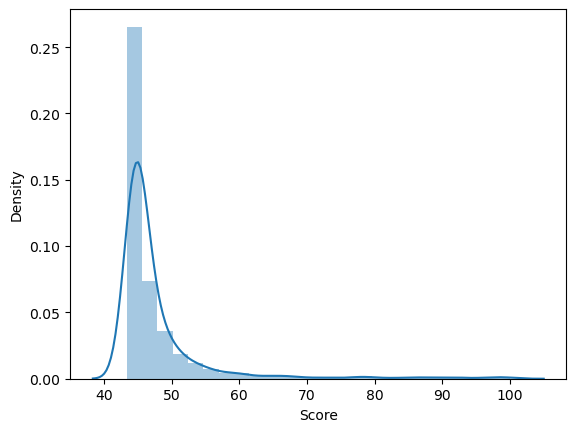

In [13]:
#check the data for extreme values
sns.distplot(df_2['Score'], bins=25)

Checking the mean, median, min and max values

In [14]:
#checking the min value
df_2['Score'].min()

43.36

In [15]:
#checking the max value
df_2['Score'].max()

100.0

In [16]:
#checking the mean
round(df_2['Score'].mean(),3)

47.798

In [17]:
#checking the median
round(df_2['Score'].median(),3)

45.1

3. Exploring the Data

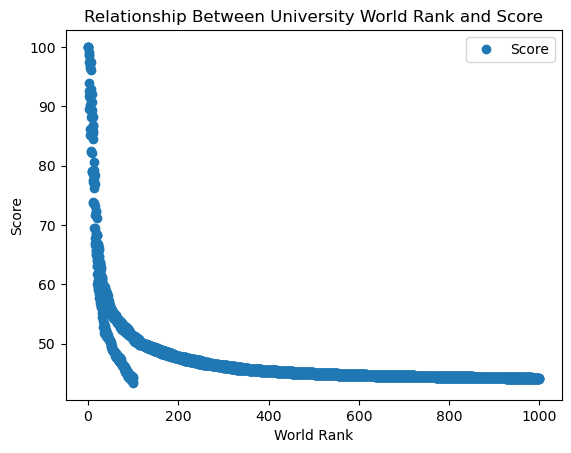

In [18]:
#explore the data visually by way of scatterplot and select variables to test the relationship
#relationshoip between the University World Rank and Score variables
df.plot(x = 'World Rank', y= 'Score', style = 'o')
plt.title ("Relationship Between University World Rank and Score")
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.show()

4. State the hypothesis

5. Hypothesis: The University World Rank variable is related to the Score for each University.

In [19]:
#reshaping the variables World Rank and Score
X = df['World Rank'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [21]:
X

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]])

In [22]:
print(len(X))

2200


In [23]:
y

array([[100.  ],
       [ 91.67],
       [ 89.5 ],
       ...,
       [ 44.03],
       [ 44.02],
       [ 44.02]])

In [24]:
print(len(y))

2200


6. Split the data into two sets: a training set and a test set.

In [25]:
#create the training set and the test set
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size =0.5, random_state =0)

In [26]:
#creating a scatterplot to measure the relationship between Quality of Education and Score

#df.plot(x = 'Quality of Education', y= 'Score', style = 'o')

#plt.title ("Relationship Between Quality of Education and Score")
#plt.xlabel('Quality of Education')
#plt.ylabel('Score')
#plt.show()

In [27]:
#reshaping the variables
#X = df['Quality of Education'].values.reshape(-1,1)
#y = df['Score'].values.reshape(-1,1)

7. Run a linear Regression Analysis

In [28]:
#creating the regression object
regression = LinearRegression()

In [29]:
print(len(X_train))

1100


In [30]:
print(len(y_train))

1100


In [31]:
#fitting the regression object on the training set
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predicted = regression.predict(X_test)

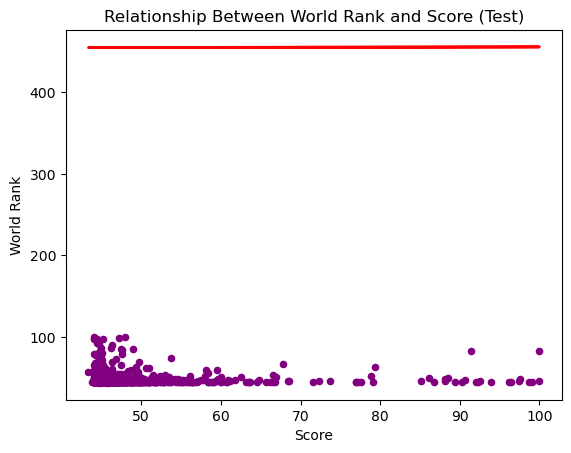

In [34]:
#creating a scatterplot that will illustrate the regression line from the model to the test set
plot_test = plt 
plot_test.scatter(X_test, y_test, color = 'purple', s= 20)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth =2)
plot_test.title ('Relationship Between World Rank and Score (Test)')
plot_test.xlabel('Score')
plot_test.ylabel('World Rank')
plot_test.show()

Initial Observation: Based on the above scatterplot, there does not appear to be a relationship between the two variables. 

8. Check the model performance statistics - MSE and R2 score.

In [35]:
#objects for model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01403466]]
Mean squared error:  165973.97889647415
R2 score:  -3007.8080389883125


Observation of the Summary Statistics: The R2 score is -3007.8080389883125, which means that the actual numbers and the predicted numbers are not close. The Slope is essentially flat, therefore we cannot really come to a conclusion that there is any kind of relationship. The Mean squared error is 165973.97889647415 which is significantly large and can tell there is a sharp contract between the predicted and real models. 


In [37]:
y_predicted

array([[454.97365712],
       [454.98867421],
       [455.15680943],
       ...,
       [454.97323608],
       [454.9705695 ],
       [454.97337643]])

In [38]:
y_predicted.shape

(1100, 1)

9. Compare the predicted y values with the actual y values in a dataframe.

In [39]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,49.70,454.973657
1,48.23,454.988674
2,51.46,455.156809
3,54.19,455.014077
4,45.01,454.986709
5,47.59,455.149932
6,45.74,455.302630
7,47.96,454.965657
8,46.58,455.003130
9,44.44,455.692091


10. Thoughts on how the model performed

As we can see from the above chart, the difference between the Actual data and Predicted data is substantially large. 
When we look at the model versus the real data, the gap is very large and therefore, we can say that there really is no relationship. 

One consideration, as we learned from the 6.4 exercise, is that the size of the data set has to be evaluated, as it may not be big enough for this type of analysis. 

Based on this regression analysis, the posed hypothesis can be deemed null. 